<a href="https://colab.research.google.com/github/asanaullah2015/cot5600/blob/master/hw_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## HW 2 ##

Problem 1


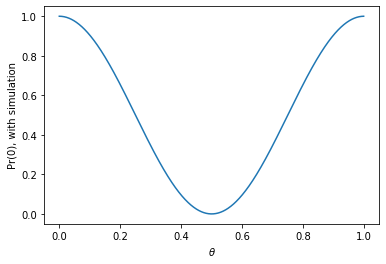

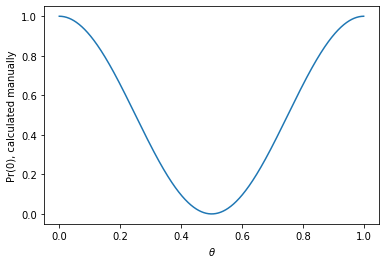

Problem 2


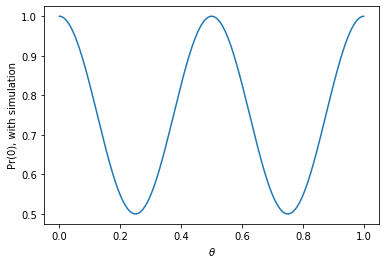

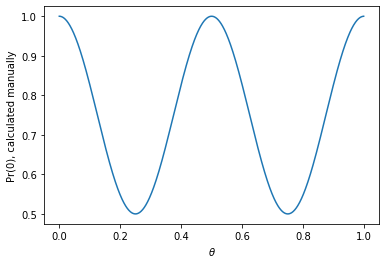

In [0]:
import math
import matplotlib.pyplot as plt
import numpy as np

Hadamard2 = np.multiply(1/math.sqrt(2), [[1, 1],
                                         [1,-1]])
Identity2 = np.eye(2)
ket0 = [1, 0]
ket1 = [0, 1]

def ProbZeroHadamard(psi, U):
  x = np.matmul(np.kron(Hadamard2, Identity2), np.kron([1, 0], psi))
  controlledU = np.add(np.kron(np.outer(ket0, ket0), Identity2), np.kron(np.outer(ket1, ket1), U))
  x = np.matmul(controlledU, x)
  x = np.matmul(np.kron(Hadamard2, Identity2), x)

  Projector = np.kron(np.outer(ket0,ket0), Identity2)
  projected = np.matmul(Projector, x)
  prob0 = np.matmul(projected.conj().T, projected)
  return prob0


Resolution = 1000;
x = []
y = []
z = []

U = [[1, 0],
     [0, 1]]
#psi = np.multiply(1/math.sqrt(2),[1, 1]) <-- Interesting Case
psi = [1, 0]

for i in range(Resolution):
  theta = 1/Resolution * i
  U = [[math.cos(theta*2*math.pi),-math.sin(theta*2*math.pi)],
       [math.sin(theta*2*math.pi), math.cos(theta*2*math.pi)]]
  x.append(theta)
  y.append(ProbZeroHadamard(psi, U))
  z.append(0.5*(1+np.matmul(np.conj(np.transpose(psi)), np.matmul(U, psi))))

print("Problem 1")
plt.plot(x,y)
plt.xlabel(r"$\theta$")
plt.ylabel(r"Pr(0), with simulation")
plt.show()
plt.xlabel(r"$\theta$")
plt.ylabel(r"Pr(0), calculated manually")
plt.plot(x,z)
plt.show()

x = []
y = []
z = []

SWAP = [[1, 0, 0, 0],
        [0, 0, 1, 0],
        [0, 1, 0, 0],
        [0, 0, 0, 1]]

def ProbZeroSWAP(psi, psi2):
  x = np.matmul(np.kron(Hadamard2, np.eye(4)), np.kron([1, 0], np.kron(psi, psi2)))
  controlledS = np.add(np.kron(np.outer(ket0, ket0), np.eye(4)), np.kron(np.outer(ket1, ket1), SWAP))
  x = np.matmul(controlledS, x)
  x = np.matmul(np.kron(Hadamard2, np.eye(4)), x)

  Projector = np.kron(np.outer(ket0,ket0), np.eye(4))
  projected = np.matmul(Projector, x)
  prob0 = np.matmul(projected.conj().T, projected)
  return prob0

for i in range(Resolution):
  theta = 1/Resolution * i
  psi2 = [math.cos(theta * 2 * math.pi), math.sin(theta * 2 * math.pi)]

  x.append(theta)
  y.append(ProbZeroSWAP(psi, psi2))
  z.append(0.5*(1+np.matmul(np.kron(psi, psi2).T.conj(), np.matmul(SWAP, np.kron(psi, psi2)))))


print("Problem 2")
plt.plot(x,y)
plt.xlabel(r"$\theta$")
plt.ylabel(r"Pr(0), with simulation")
plt.show()
plt.xlabel(r"$\theta$")
plt.ylabel(r"Pr(0), calculated manually")
plt.plot(x,z)
plt.show()